In [2]:
# Import statements
import json
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import re
import requests
import seaborn as sns
import tweepy

from datetime import datetime
from functools import reduce

### GATHER

Gathering data from various sources is the first step of any data analysis project. Here we will gather data from sources like CSV files, Images from Udacity website, Tweets from various people. 


In [3]:
# Load the enhanced twitter archive file we were given
twitter1 = pd.read_csv('twitter-archive-enhanced.csv')

In [4]:
# Scrape the image predictions file from the Udacity website
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv' 
response = requests.get(url)
with open(os.path.join('image_predictions.tsv'), mode = 'wb') as file:
    file.write(response.content)

In [5]:
# Load the image predictions file
images = pd.read_csv('image_predictions.tsv', sep = '\t')

In [6]:
# Setting up the Twitter API with authentication pieces
consumer_key = '...'
consumer_secret = '...'
access_token = '...'
access_secret = '...'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [7]:
# Use Twitter API to collect status data on tweets present in twitter1 dataframe
tweet_ids = list(twitter1['tweet_id'])

tweet_data = []
tweet_id_success = []
tweet_id_missing = []
for tweet_id in tweet_ids:
    try:
        data = api.get_status(tweet_id, 
                              tweet_mode='extended',
                              wait_on_rate_limit = True,
                              wait_on_rate_limit_notify = True)
        tweet_data.append(data)
        tweet_id_success.append(tweet_id)
    except:
        tweet_id_missing.append(tweet_id)
        print(tweet_id)

888202515573088257
873697596434513921
872668790621863937
872261713294495745
869988702071779329
866816280283807744
861769973181624320
856602993587888130
851953902622658560
845459076796616705
844704788403113984
842892208864923648
837366284874571778
837012587749474308
829374341691346946
827228250799742977
812747805718642688
802247111496568832
775096608509886464
770743923962707968
Rate limit reached. Sleeping for: 734
754011816964026368
680055455951884288
Rate limit reached. Sleeping for: 733


In [12]:
# Write tweet data to json file
with open('tweet_json.txt', mode = 'w') as file:
       json.dump(tweet_data, file)


In [9]:
# Load the Twitter API data
twitter2 = pd.read_json('tweet_json.txt')
twitter2['tweet_id'] = tweet_id_success
twitter2 = twitter2[['tweet_id', 'favorite_count', 'retweet_count']]

In [10]:
twitter2.sample(3)

,tweet_id,favorite_count,retweet_count
2132,669625907762618368,3511,1820
166,858471635011153920,21361,4821
562,800459316964663297,9994,2309


### Assess and Analyze

In this phase we take a look at all the available data both visually and programmatically. This helps us to find out issues in the data which we will eventually work upon in the Clean phase of the project. At the end of this phase we will list out the issues that we found in our data. This list may or may not be exhaustive. 

In [13]:
twitter1.sample(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
918,756651752796094464,NaN,NaN,2016-07-23 00:46:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Gert. He just wants you to be happy. 1...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/756651752...,11,10,Gert,None,None,None,None
747,779834332596887552,NaN,NaN,2016-09-25 00:06:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Scout. He really wants to kiss himself...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/779834332...,11,10,Scout,None,None,None,None
1886,674790488185167872,NaN,NaN,2015-12-10 03:19:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",ER... MER... GERD 13/10 https://t.co/L1puJISV1a,NaN,NaN,NaN,https://twitter.com/dog_rates/status/674790488...,13,10,None,None,None,None,None


In [14]:
twitter1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [15]:
twitter1['tweet_id'].value_counts()

749075273010798592    1
741099773336379392    1
798644042770751489    1
825120256414846976    1
769212283578875904    1
700462010979500032    1
780858289093574656    1
699775878809702401    1
880095782870896641    1
760521673607086080    1
776477788987613185    1
691820333922455552    1
715696743237730304    1
714606013974974464    1
760539183865880579    1
813157409116065792    1
676430933382295552    1
743510151680958465    1
837012587749474308    1
833722901757046785    1
818259473185828864    1
670704688707301377    1
667160273090932737    1
674394782723014656    1
672082170312290304    1
670093938074779648    1
759923798737051648    1
809920764300447744    1
805487436403003392    1
838085839343206401    1
                     ..
763956972077010945    1
870308999962521604    1
720775346191278080    1
785927819176054784    1
783347506784731136    1
775733305207554048    1
834209720923721728    1
825026590719483904    1
758405701903519748    1
668986018524233728    1
6909388994772213

In [16]:
twitter1['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [17]:
twitter1['text'].value_counts()

Take all my money. 10/10 https://t.co/B28ebc5LzQ                                                                                                                        1
This is Stanley. He has his first swim lesson today. Doggle straps adjusted. Ready to go. 13/10 Phelps is nervous (IG: stanleythe_corgi) https://t.co/Nx52PGwH94        1
This is Ralph. He's an interpretive dancer. 10/10 https://t.co/zoDdPyPFsa                                                                                               1
RT @dog_rates: This is Paisley. She really wanted to be president this time. Dreams officially crushed. 13/10 https://t.co/liJGwMp17E                                   1
RT @dog_rates: This is Gidget. She's a spy pupper. Stealthy as h*ck. Must've slipped pup and got caught. 12/10 would forgive then pet https…                            1
Happy Wednesday here's a bucket of pups. 44/40 would pet all at once https://t.co/HppvrYuamZ                                                          

In [18]:
twitter1['retweeted_status_id'].value_counts()

7.757333e+17    1
7.507196e+17    1
6.742918e+17    1
6.833919e+17    1
8.269587e+17    1
8.780576e+17    1
7.320056e+17    1
7.186315e+17    1
6.732953e+17    1
7.914070e+17    1
8.447048e+17    1
7.862340e+17    1
8.685523e+17    1
7.504293e+17    1
8.327664e+17    1
6.690004e+17    1
6.873173e+17    1
7.638376e+17    1
7.815247e+17    1
8.092201e+17    1
8.000650e+17    1
8.174239e+17    1
8.001414e+17    1
7.909461e+17    1
7.867091e+17    1
8.406323e+17    1
8.688804e+17    1
7.869631e+17    1
7.733088e+17    1
8.222448e+17    1
               ..
6.816941e+17    1
7.899865e+17    1
7.939622e+17    1
6.800555e+17    1
7.128090e+17    1
8.164506e+17    1
6.769365e+17    1
6.675487e+17    1
8.083449e+17    1
7.626999e+17    1
6.678667e+17    1
8.479710e+17    1
6.820881e+17    1
8.352641e+17    1
7.761133e+17    1
7.902771e+17    1
6.675484e+17    1
7.677549e+17    1
8.782815e+17    1
8.663350e+17    1
7.399792e+17    1
7.403732e+17    1
8.395493e+17    1
7.001438e+17    1
8.482894e+

In [19]:
twitter1['retweeted_status_user_id'].value_counts()

4.196984e+09    156
4.296832e+09      2
5.870972e+07      1
6.669901e+07      1
4.119842e+07      1
7.475543e+17      1
7.832140e+05      1
7.266347e+08      1
4.871977e+08      1
5.970642e+08      1
4.466750e+07      1
1.228326e+09      1
7.992370e+07      1
2.488557e+07      1
7.874618e+17      1
3.638908e+08      1
5.128045e+08      1
8.117408e+08      1
1.732729e+09      1
1.960740e+07      1
1.547674e+08      1
3.410211e+08      1
7.124572e+17      1
2.804798e+08      1
1.950368e+08      1
Name: retweeted_status_user_id, dtype: int64

In [20]:
twitter1['retweeted_status_timestamp'].value_counts()

2015-11-20 03:41:59 +0000    1
2015-11-16 04:02:55 +0000    1
2017-05-22 00:28:40 +0000    1
2017-06-09 16:22:42 +0000    1
2017-03-16 00:00:07 +0000    1
2016-09-07 15:44:53 +0000    1
2016-08-05 21:19:27 +0000    1
2016-07-30 17:56:51 +0000    1
2016-11-06 01:33:58 +0000    1
2016-11-09 00:37:46 +0000    1
2015-12-08 18:17:56 +0000    1
2016-10-01 19:47:08 +0000    1
2016-09-28 00:46:20 +0000    1
2015-12-21 22:15:18 +0000    1
2016-10-21 18:16:44 +0000    1
2016-10-02 23:23:04 +0000    1
2017-06-23 01:10:23 +0000    1
2016-02-02 23:52:22 +0000    1
2016-08-08 17:19:51 +0000    1
2016-09-19 01:42:24 +0000    1
2016-09-25 00:06:08 +0000    1
2016-08-31 15:10:07 +0000    1
2016-07-25 15:23:28 +0000    1
2016-09-26 17:55:00 +0000    1
2016-10-03 15:42:44 +0000    1
2015-12-28 17:12:42 +0000    1
2015-11-20 03:43:06 +0000    1
2017-02-12 01:04:29 +0000    1
2016-04-09 02:47:55 +0000    1
2016-10-19 15:37:03 +0000    1
                            ..
2017-01-27 17:04:02 +0000    1
2017-01-

In [21]:
twitter1['expanded_urls'].value_counts()

https://www.gofundme.com/surgeryforjacktheminpin,https://twitter.com/dog_rates/status/815990720817401858/photo/1                                                                                                                                                   2
https://twitter.com/dog_rates/status/809220051211603969/photo/1,https://twitter.com/dog_rates/status/809220051211603969/photo/1                                                                                                                                    2
https://twitter.com/dog_rates/status/761672994376806400/video/1                                                                                                                                                                                                    2
https://twitter.com/dog_rates/status/783839966405230592/photo/1,https://twitter.com/dog_rates/status/783839966405230592/photo/1,https://twitter.com/dog_rates/status/783839966405230592/photo/1                          

In [22]:
twitter1['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [23]:
twitter1['rating_denominator'].value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [24]:
twitter1['name'].value_counts()

None            745
a                55
Charlie          12
Oliver           11
Lucy             11
Cooper           11
Penny            10
Lola             10
Tucker           10
Bo                9
Winston           9
the               8
Sadie             8
an                7
Toby              7
Daisy             7
Buddy             7
Bailey            7
Bella             6
Milo              6
Scout             6
Oscar             6
Dave              6
Jack              6
Koda              6
Jax               6
Leo               6
Rusty             6
Stanley           6
George            5
               ... 
Strudel           1
Genevieve         1
Lulu              1
Rizzo             1
Dunkin            1
infuriating       1
Chuck             1
Dot               1
Cedrick           1
Naphaniel         1
Bobby             1
Tayzie            1
Cleopatricia      1
Stewie            1
Wiggles           1
Duchess           1
Jay               1
Traviss           1
Mutt              1


In [25]:
twitter1.loc[twitter1['name'].str.isupper()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
775,776201521193218049,NaN,NaN,2016-09-14 23:30:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is O'Malley. That is how he sleeps. Doesn...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/776201521...,10,10,O,None,None,None,None
2041,671542985629241344,NaN,NaN,2015-12-01 04:14:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is JD (stands for ""just dog""). He's like ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/671542985...,10,10,JD,None,None,None,None


In [26]:
twitter2.sample(5)

,tweet_id,favorite_count,retweet_count
1212,712809025985978368,19036,6956
574,798933969379225600,13827,4794
621,793256262322548741,21083,8947
1651,682389078323662849,1710,487
702,783347506784731136,0,5972


In [27]:
twitter2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2334 entries, 0 to 2333
Data columns (total 3 columns):
tweet_id          2334 non-null int64
favorite_count    2334 non-null int64
retweet_count     2334 non-null int64
dtypes: int64(3)
memory usage: 54.8 KB


In [28]:
twitter2['tweet_id'].value_counts()

749075273010798592    1
671163268581498880    1
743510151680958465    1
798644042770751489    1
825120256414846976    1
769212283578875904    1
700462010979500032    1
780858289093574656    1
699775878809702401    1
880095782870896641    1
760521673607086080    1
776477788987613185    1
691820333922455552    1
715696743237730304    1
714606013974974464    1
760539183865880579    1
813157409116065792    1
833722901757046785    1
805487436403003392    1
842765311967449089    1
670093938074779648    1
756651752796094464    1
674742531037511680    1
670704688707301377    1
667160273090932737    1
674394782723014656    1
672082170312290304    1
759923798737051648    1
685315239903100929    1
818259473185828864    1
                     ..
870308999962521604    1
720775346191278080    1
879492040517615616    1
775733305207554048    1
667911425562669056    1
834209720923721728    1
825026590719483904    1
758405701903519748    1
668986018524233728    1
690938899477221376    1
6788002836490690

In [29]:
twitter2['favorite_count'].value_counts()

0        165
237        3
1329       3
1255       3
511        3
2239       3
1189       3
2645       3
944        3
3963       3
2134       3
3696       2
10561      2
2228       2
7671       2
2986       2
5606       2
188        2
2220       2
1765       2
19888      2
488        2
1498       2
2216       2
500        2
2408       2
456        2
7613       2
12669      2
383        2
        ... 
627        1
3726       1
31318      1
6706       1
565        1
64054      1
567        1
571        1
573        1
2622       1
575        1
8779       1
10830      1
2640       1
2642       1
16985      1
12913      1
2650       1
25179      1
19036      1
4703       1
1074       1
609        1
6754       1
4707       1
25189      1
6520       1
621        1
6768       1
286        1
Name: favorite_count, Length: 2005, dtype: int64

In [30]:
twitter2['retweet_count'].value_counts()

214      4
55       4
2078     4
633      4
582      4
1279     4
130      4
361      4
2400     4
564      4
1383     4
4086     4
701      4
552      4
3120     3
478      3
481      3
1075     3
487      3
6110     3
1789     3
498      3
5820     3
476      3
1236     3
1226     3
2130     3
81       3
2570     3
519      3
        ..
3364     1
4123     1
1311     1
31       1
3358     1
4129     1
2082     1
2045     1
37       1
2086     1
4105     1
2054     1
4043     1
4101     1
4045     1
2002     1
2004     1
2006     1
10206    1
8161     1
2018     1
4071     1
58       1
2030     1
3382     1
2048     1
1        1
30005    1
3        1
6143     1
Name: retweet_count, Length: 1712, dtype: int64

In [31]:
images.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1330,757597904299253760,https://pbs.twimg.com/media/CoOGZjiWAAEMKGx.jpg,1,doormat,0.836106,False,wallet,0.056627,False,purse,0.051333,False
2028,882627270321602560,https://pbs.twimg.com/media/DD-40X3WAAAJPU5.jpg,1,Pembroke,0.542982,True,Chihuahua,0.251988,True,Cardigan,0.107699,True
182,669351434509529089,https://pbs.twimg.com/media/CUoDk8mWsAAMyBL.jpg,1,cuirass,0.756829,False,breastplate,0.233520,False,bulletproof_vest,0.003812,False
1313,754747087846248448,https://pbs.twimg.com/media/CnlmeL3WgAA4c84.jpg,1,rotisserie,0.471493,False,cash_machine,0.250837,False,sliding_door,0.117872,False
1478,780601303617732608,https://pbs.twimg.com/media/CtVAvX-WIAAcGTf.jpg,1,Saint_Bernard,0.995143,True,Cardigan,0.003044,True,English_springer,0.001050,True


In [32]:
images.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [33]:
images['tweet_id'].value_counts()

685532292383666176    1
826598365270007810    1
692158366030913536    1
714606013974974464    1
715696743237730304    1
776477788987613185    1
772114945936949249    1
699775878809702401    1
780858289093574656    1
700462010979500032    1
732726085725589504    1
738883359779196928    1
798644042770751489    1
743510151680958465    1
837012587749474308    1
833722901757046785    1
668620235289837568    1
842765311967449089    1
685315239903100929    1
673686845050527744    1
680473011644985345    1
666051853826850816    1
675853064436391936    1
693231807727280129    1
705475953783398401    1
829449946868879360    1
759923798737051648    1
667160273090932737    1
680934982542561280    1
743545585370791937    1
                     ..
794926597468000259    1
776113305656188928    1
825026590719483904    1
834209720923721728    1
775733305207554048    1
669564461267722241    1
879492040517615616    1
720775346191278080    1
666362758909284353    1
750506206503038976    1
6931556864910008

In [34]:
images['jpg_url'].value_counts()

https://pbs.twimg.com/media/CvoBPWRWgAA4het.jpg                                            2
https://pbs.twimg.com/media/DFDw2tyUQAAAFke.jpg                                            2
https://pbs.twimg.com/media/Cwx99rpW8AMk_Ie.jpg                                            2
https://pbs.twimg.com/media/CW88XN4WsAAlo8r.jpg                                            2
https://pbs.twimg.com/media/CtVAvX-WIAAcGTf.jpg                                            2
https://pbs.twimg.com/media/C12x-JTVIAAzdfl.jpg                                            2
https://pbs.twimg.com/media/CVMOlMiWwAA4Yxl.jpg                                            2
https://pbs.twimg.com/media/CV_cnjHWUAADc-c.jpg                                            2
https://pbs.twimg.com/media/Co-hmcYXYAASkiG.jpg                                            2
https://pbs.twimg.com/media/Cp6db4-XYAAMmqL.jpg                                            2
https://pbs.twimg.com/media/CdHwZd0VIAA4792.jpg                       

## List of Issues
### Quality

#### Twitter1 Dataframe
1. Data contains retweets (ie. rows where retweeted_status_id and retweeted_status_user_id have a number instead of NaN)
2. tweet_id is an integer
3. timestamp and retweeted_status_timestamp are currently of type 'object'
4. source is in HTML format with a and \a tags surrounding the text
5. name has values that are the string "None" instead of NaN
6. Looking programmatically, some names are inaccurate such as "a", "an", "the", "very", "by", etc. Looking visually in Excel, I was able to find more names that are inaccurate including "actually", "quite", "unacceptable", "mad", "not" and "old. It seems like the method used to extract the names was using the word the followed "This is..." and "Here is..." which leads to some inaccuracies.
7. Found an instance of a name being "O" instead of "O'Malley"
8. doggo, floofer, pupper, and puppo have values that are the string "None" instead of NaN
9. Upon visual inspection in Excel, there are ratings that are incorrect. I ordered the ratings from low to high and looked at the extremes only for incorrect ratings therefore there are likely more than I missed and will be difficult to find them all programmatically. Examples where things may have gone wrong is the use of decimals, or when two instances of numbers separated by a slash are present in 1 text and I assume the first was chosen. Also, there are ratings with decimals such as 13.5/10, 9.5/10 have been incorrectly extracted as 5/10 (in addition to other numbers with decimals such as 11.26 and 11.27). There are instances of 1/2 and 50/50 which are not ratings such signifying "half" which have been considered as ratings. Finally, use of 4/20 and 24/7 has been confused as ratings.
10. For future analysis it could be confusing to interpret unstandardized ratings. It is their gimmick to give dogs a rating of 100% but not all are above 100% so it could be interesting to see what % are below or above 100% and how this changed overtime by calculating a single value for rating.
11. There are many columns in this dataframe making it hard to read, and some will not be needed for analysis.

#### Twitter2 Dataframe
1. There are 11 missing tweets compared to the twitter1 datagrame (I am assuming they have been deleted)

#### Images Dataframe
1. There are 2356 tweets in the twitter1 dataframe and 2075 rows in the images dataframe. This could mean that there is missing data, or that not all 2356 of the tweets had pictures.
2. tweet_id is an integer
3. p1, p2, and p3 contain underscores instead of spaces in the labels


### Tidiness
#### Twitter1 dataframe
1. 1 variable (dog stage) in 4 different columns (doggo, floofer, pupper, and puppo)

#### Twitter2 dataframe
1. twitter2 data should be combined with the twitter1 data since they are information about the same tweet

#### Images dataframe
1. images data could be combined with the twitter1 data as well since it is all information about 1 tweet

## Clean

In [35]:
# Make copies of the dataframes for cleaning
twitter1_clean = twitter1.copy()
twitter2_clean = twitter2.copy()
images_clean = images.copy()


### Tidiness issue 1 - Merge all dataframes
#### Define
Issue: twitter2 and images data should be combined with the twitter1 data since they are information about the same tweet 
Solution: Merge the 3 datasets together on 'tweet_id' using the reduce function.

#### Code

In [36]:
# Merge the twitter1, twitter2, and images dataframes on 'tweet_id'
dfs = [twitter1_clean, twitter2_clean, images_clean]
twitter = reduce(lambda left,right: pd.merge(left,right,on='tweet_id'), dfs)

#### Test

In [37]:
# View first few lines of new twitter dataframe to ensure the columns have merged
twitter.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [38]:
# View info of new twitter dataframe to ensure the columns have merged
twitter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2062 entries, 0 to 2061
Data columns (total 30 columns):
tweet_id                      2062 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2062 non-null object
source                        2062 non-null object
text                          2062 non-null object
retweeted_status_id           74 non-null float64
retweeted_status_user_id      74 non-null float64
retweeted_status_timestamp    74 non-null object
expanded_urls                 2062 non-null object
rating_numerator              2062 non-null int64
rating_denominator            2062 non-null int64
name                          2062 non-null object
doggo                         2062 non-null object
floofer                       2062 non-null object
pupper                        2062 non-null object
puppo                         2062 non-null object
favorite_count                2062 


### Tidiness issue 2 - One column for dog stages
#### Define
**Issue:** 1 variable (dog stage) in 4 different columns (doggo, floofer, pupper, and puppo) 
**Solution:** Extract the dog stages from the 'text' column into the new 'dog_stage' column using regular expression then drop the 'doggo', 'floofer', 'pupper', and 'puppo' columns. This also takes care of the quality issue of "name has values that are the string "None" instead of NaN".

In [39]:
#Extract dog stages from 'text' column into new 'dog_stage' column 
twitter['dog_stage'] = twitter['text'].str.extract('(doggo|floofer|pupper|puppo)')

In [40]:
twitter[['dog_stage','doggo', 'floofer', 'pupper', 'puppo']].head(15)

,dog_stage,doggo,floofer,pupper,puppo
0,NaN,None,None,None,None
1,NaN,None,None,None,None
2,NaN,None,None,None,None
3,NaN,None,None,None,None
4,NaN,None,None,None,None
5,NaN,None,None,None,None
6,NaN,None,None,None,None
7,NaN,None,None,None,None
8,NaN,None,None,None,None
9,doggo,doggo,None,None,None


In [41]:
# Drop doggo, floofer, pupper, and puppo columns
twitter = twitter.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1)

#### Test

In [42]:
# Check for presence of 'dog_stage" and absence of 'doggo', 'floofer', 
# 'pupper', and 'puppo'
twitter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2062 entries, 0 to 2061
Data columns (total 27 columns):
tweet_id                      2062 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2062 non-null object
source                        2062 non-null object
text                          2062 non-null object
retweeted_status_id           74 non-null float64
retweeted_status_user_id      74 non-null float64
retweeted_status_timestamp    74 non-null object
expanded_urls                 2062 non-null object
rating_numerator              2062 non-null int64
rating_denominator            2062 non-null int64
name                          2062 non-null object
favorite_count                2062 non-null int64
retweet_count                 2062 non-null int64
jpg_url                       2062 non-null object
img_num                       2062 non-null int64
p1                            2062 non


### Quality issue 1 - Remove retweets

#### Define
**Issue:** Data contains retweets 
**Solution:** Rows where 'retweeted_status_id' is a NaN will be kept (ie. if it has a value it will be removed), then the 'retweeted_status_id', 'retweeted_status_user_id' and 'retweeted_status_timestamp' columns will be removed.

Code

In [43]:
# Keep columns where 'retweeted_status_id' is NaN
twitter = twitter[np.isnan(twitter.retweeted_status_id)]

# Check info to determine all there are no non-null entries for
# 'retweeted_status_id', 'retweeted_status_user_id' and 
# 'retweeted_status_timestamp'
print(twitter.info())

# Remove 'retweeted_status_id', 'retweeted_status_user_id' and 
# 'retweeted_status_timestamp' columns
twitter = twitter.drop(['retweeted_status_id', 
                        'retweeted_status_user_id', 
                        'retweeted_status_timestamp'], 
                       axis=1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1988 entries, 0 to 2061
Data columns (total 27 columns):
tweet_id                      1988 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     1988 non-null object
source                        1988 non-null object
text                          1988 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1988 non-null object
rating_numerator              1988 non-null int64
rating_denominator            1988 non-null int64
name                          1988 non-null object
favorite_count                1988 non-null int64
retweet_count                 1988 non-null int64
jpg_url                       1988 non-null object
img_num                       1988 non-null int64
p1                            1988 non-nu

#### Test

In [44]:
# Check info to ensure the 'retweeted_status_id', 'retweeted_status_user_id' 
# and 'retweeted_status_timestamp' columns have been dropped
twitter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1988 entries, 0 to 2061
Data columns (total 24 columns):
tweet_id                 1988 non-null int64
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                1988 non-null object
source                   1988 non-null object
text                     1988 non-null object
expanded_urls            1988 non-null object
rating_numerator         1988 non-null int64
rating_denominator       1988 non-null int64
name                     1988 non-null object
favorite_count           1988 non-null int64
retweet_count            1988 non-null int64
jpg_url                  1988 non-null object
img_num                  1988 non-null int64
p1                       1988 non-null object
p1_conf                  1988 non-null float64
p1_dog                   1988 non-null bool
p2                       1988 non-null object
p2_conf                  1988 non-null float64
p2_dog                   19

### Quality issue 2 - tweet_id is an integer

#### Define
**Issue:** tweet_id is an integer 
**Solution:** Change tweet_id to a string/object

#### Code

In [45]:
# Change 'tweet_id' to a string
twitter['tweet_id'] = twitter['tweet_id'].astype(str)


#### Test

In [46]:
# Check info to confirm tweet_id has been changed from an
# integer to a string/object
twitter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1988 entries, 0 to 2061
Data columns (total 24 columns):
tweet_id                 1988 non-null object
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                1988 non-null object
source                   1988 non-null object
text                     1988 non-null object
expanded_urls            1988 non-null object
rating_numerator         1988 non-null int64
rating_denominator       1988 non-null int64
name                     1988 non-null object
favorite_count           1988 non-null int64
retweet_count            1988 non-null int64
jpg_url                  1988 non-null object
img_num                  1988 non-null int64
p1                       1988 non-null object
p1_conf                  1988 non-null float64
p1_dog                   1988 non-null bool
p2                       1988 non-null object
p2_conf                  1988 non-null float64
p2_dog                   1


### Quality issue 3 - 'timestamp' type

#### Define
**Issue:** 'timestamp' and 'retweeted_status_timestamp' are currently of type 'object' 
**Solution:** Convert 'timestamp' to a datetime object ('retweeted_status_timestamp' was deleted)

#### Code

In [47]:
# Remove the time zone information from 'timestamp' column
twitter['timestamp'] = twitter['timestamp'].str.slice(start=0, stop=-6)

In [48]:
# Change the 'timestamp' column to a datetime object
twitter['timestamp'] = pd.to_datetime(twitter['timestamp'], format = "%Y-%m-%d %H:%M:%S")

#### Test

In [49]:

# Confirm that 'timestamp' column is now a datetime object
twitter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1988 entries, 0 to 2061
Data columns (total 24 columns):
tweet_id                 1988 non-null object
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                1988 non-null datetime64[ns]
source                   1988 non-null object
text                     1988 non-null object
expanded_urls            1988 non-null object
rating_numerator         1988 non-null int64
rating_denominator       1988 non-null int64
name                     1988 non-null object
favorite_count           1988 non-null int64
retweet_count            1988 non-null int64
jpg_url                  1988 non-null object
img_num                  1988 non-null int64
p1                       1988 non-null object
p1_conf                  1988 non-null float64
p1_dog                   1988 non-null bool
p2                       1988 non-null object
p2_conf                  1988 non-null float64
p2_dog            

### Quality issue 4/5/6 - Various issues with 'name'

#### Define

**Issue:**
1. name has values that are the string "None" instead of NaN
2. Looking programmatically, some names are inaccurate such as "a", "an", "the", "very", "by", etc. Looking visually in Excel, I was able to find more names that are inaccurate including "actually", "quite", "unacceptable", "mad", "not" and "old. It seems like the method used to extract the names was using the word the followed "This is..." and "Here is..." which leads to some inaccuracies.
3. I also found an instand of a name being "O" instead of "O'Malley" 
**Solution:** Replace all inaccurate names with NaNs, and the "O" with "O'Malley".

#### Code

In [50]:
# Find all names that start with a lowercase letter
lowercase_names = []
for row in twitter['name']:
    if row[0].islower() and row not in lowercase_names:
        lowercase_names.append(row)
print(lowercase_names)

['such', 'a', 'quite', 'one', 'incredibly', 'very', 'my', 'not', 'his', 'an', 'just', 'getting', 'this', 'unacceptable', 'all', 'infuriating', 'the', 'actually', 'by', 'officially', 'light', 'space']


In [51]:
# Replace all names that start with a lowercase letter with a NaN
twitter['name'].replace(lowercase_names, 
                        np.nan,
                       inplace = True)

# Replace all 'None's with a NaN
twitter['name'].replace('None', 
                        np.nan,
                       inplace = True)

# Replace the name 'O' with "O'Malley" 
twitter['name'].replace('O', 
                        "O'Malley",
                       inplace = True)

#### Test

In [52]:
# Check value counts to see that None and names starting with 
# a lowercase letter are gone
twitter['name'].value_counts()

Oliver      10
Cooper      10
Charlie     10
Penny        9
Tucker       9
Lucy         9
Sadie        8
Winston      8
Toby         7
Daisy        7
Lola         7
Bo           6
Bella        6
Koda         6
Jax          6
Stanley      6
Rusty        5
Chester      5
Leo          5
Oscar        5
Louis        5
Scout        5
Buddy        5
Bailey       5
Dave         5
Milo         5
Clark        4
Oakley       4
Cassie       4
Sophie       4
            ..
Karll        1
Rhino        1
Amy          1
Mary         1
Pupcasso     1
Tito         1
Bobbay       1
Moofasa      1
Lacy         1
Chesney      1
Gidget       1
Ambrose      1
Jerome       1
Lilly        1
Richie       1
Trevith      1
Major        1
Harnold      1
Lassie       1
Rupert       1
Ronduh       1
Katie        1
Tater        1
Peanut       1
Jo           1
Emmy         1
Nimbus       1
Clifford     1
Timison      1
Rey          1
Name: name, Length: 911, dtype: int64

### Quality issue 7 - Inaccurate ratings¶
#### Define
**Issue:** Some ratings with decimals such as 13.5/10, 9.5/10 have been incorrectly exported as 5/10 (in addition to other numbers with decimals such as 11.26 and 11.27).

**Solution:** Find all instances of ratings that contained decimals and replace the numerator values with the correct values.

#### Code

In [53]:
# Obtain all text, indices, and ratings for tweets that contain a decimal 
# in the numerator of rating
ratings_with_decimals_text = []
ratings_with_decimals_index = []
ratings_with_decimals = []

for i, text in twitter['text'].iteritems():
    if bool(re.search('\d+\.\d+\/\d+', text)):
        ratings_with_decimals_text.append(text)
        ratings_with_decimals_index.append(i)
        ratings_with_decimals.append(re.search('\d+\.\d+', text).group())

# Print the text to confirm presence of ratings with decimals        
ratings_with_decimals_text

['This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948',
 "This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",
 "This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq",
 'Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD']

In [54]:
# Print the index of text with decimal ratings
ratings_with_decimals_index

[40, 548, 604, 1441]

In [55]:
# Change contents of 'rating_numerator' based on info found in 
# preceeding 2 cells
twitter.loc[ratings_with_decimals_index[0],'rating_numerator'] = float(ratings_with_decimals[0])
twitter.loc[ratings_with_decimals_index[1],'rating_numerator'] = float(ratings_with_decimals[1])
twitter.loc[ratings_with_decimals_index[2],'rating_numerator'] = float(ratings_with_decimals[2])
twitter.loc[ratings_with_decimals_index[3],'rating_numerator'] = float(ratings_with_decimals[3])

#### Test

In [56]:
# Check contents of row with index 40 to ensure the rating is corrected
twitter.loc[40]

tweet_id                                                883482846933004288
in_reply_to_status_id                                                  NaN
in_reply_to_user_id                                                    NaN
timestamp                                              2017-07-08 00:28:19
source                   <a href="http://twitter.com/download/iphone" r...
text                     This is Bella. She hopes her smile made you sm...
expanded_urls            https://twitter.com/dog_rates/status/883482846...
rating_numerator                                                      13.5
rating_denominator                                                      10
name                                                                 Bella
favorite_count                                                       44387
retweet_count                                                         9450
jpg_url                    https://pbs.twimg.com/media/DELC9dZXUAADqUk.jpg
img_num                  


### Quality issue 8 - Unstandardized ratings

#### Define
**Issue:** For future analysis it could be confusing to interpret unstandardized ratings. It is their gimmick to give dogs a rating of 100% but not all are above 100% so it could be interesting to see what % are below or above 100% and how this changed overtime by calculating a single value for rating. 
**Solution:** Calulate the value of the numerator divided by the denominator and save this in a new column called 'rating'.

#### Code

In [57]:
# Calulate the value of 'rating'
twitter['rating'] = twitter['rating_numerator'] / twitter['rating_denominator']

#### Test

In [58]:
# Check for presence of new column and correct calculation
twitter.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stage,rating
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10,Phineas,...,0.097049,False,bagel,0.085851,False,banana,0.07611,False,NaN,1.3


### Quality issue 9 - Unnessary columns and text cut off

#### Define
**Issue:** There are many columns in this dataframe making it hard to read, and some will not be needed for analysis. In addition some of the text in the table output is cut off. 
**Solution:** Drop undesired columns and change table display settings.

#### Code

In [ ]:
# View all column names
twitter.columns

In [60]:
# Change some column names so they are shorter
twitter.rename(columns={'rating_numerator': 'numerator', 
                        'rating_denominator': 'denominator'}, inplace=True)

# Drop undesired columns to make dataframe easier to view
twitter.drop(['in_reply_to_status_id', 
              'in_reply_to_user_id',
              'source',
              'img_num'], axis=1, inplace=True)

# Allow all columns and text to be shown 
pd.set_option('display.max_columns', None)

#### Test

In [61]:
# Confirm that now dataframe contains the desired columns and
# all text is shown for easy viewing
twitter.head(1)

,tweet_id,timestamp,text,expanded_urls,numerator,denominator,name,favorite_count,retweet_count,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stage,rating
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10,Phineas,37388,8082,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,orange,0.097049,False,bagel,0.085851,False,banana,0.07611,False,NaN,1.3


In [62]:
# Save twitter dataframe to a CSV file
twitter.to_csv('twitter_archive_master.csv')

### Visualization

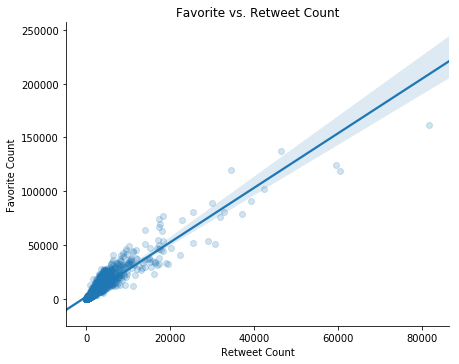

In [63]:
# Plot scatterplot of retweet vs favorite count
sns.lmplot(x="retweet_count", 
           y="favorite_count", 
           data=twitter,
           size = 5,
           aspect=1.3,
           scatter_kws={'alpha':1/5})
plt.title('Favorite vs. Retweet Count')
plt.xlabel('Retweet Count')
plt.ylabel('Favorite Count');


**Favorite and retweet counts are highly positively correlated. For about every 4 favorites there is 1 retweet. The majority of the data falls below 40000 favorites and 10000 retweets.**

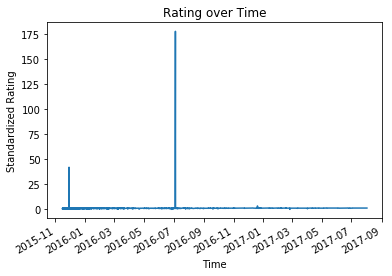

In [64]:
# Plot standardized ratings over time
twitter.groupby('timestamp')['rating'].mean().plot(kind='line')
plt.title('Rating over Time')
plt.xlabel('Time')
plt.ylabel('Standardized Rating')
plt.show;

In [65]:
# There are some outliers with a rating over 2.  
# Find them to see if they are inaccurate or just unique.
twitter.loc[twitter['rating'] > 2]

,tweet_id,timestamp,text,expanded_urls,numerator,denominator,name,favorite_count,retweet_count,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stage,rating
406,810984652412424192,2016-12-19 23:06:23,Meet Sam. She smiles 24/7 &amp; secretly aspir...,"https://www.gofundme.com/sams-smile,https://tw...",24.0,7,Sam,5613,1540,https://pbs.twimg.com/media/C0EyPZbXAAAceSc.jpg,golden_retriever,0.871342,True,Tibetan_mastiff,0.036708,True,Labrador_retriever,0.025823,True,NaN,3.428571
792,749981277374128128,2016-07-04 15:00:45,This is Atticus. He's quite simply America af....,https://twitter.com/dog_rates/status/749981277...,1776.0,10,Atticus,5291,2572,https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg,bow_tie,0.533941,False,sunglasses,0.080822,False,sunglass,0.050776,False,NaN,177.600000
1784,670842764863651840,2015-11-29 05:52:33,After so many requests... here you go.\n\nGood...,https://twitter.com/dog_rates/status/670842764...,420.0,10,NaN,24515,8715,https://pbs.twimg.com/media/CU9P717W4AAOlKx.jpg,microphone,0.096063,False,accordion,0.094075,False,drumstick,0.061113,False,NaN,42.000000


The first instance is a rating of 24/7 which is inaccurate and I had found when looking for quality errors but decided not to fix. If we were required to fix all problems then this tweet could be removed but I will ignore in this case. The other 2 tweets are accurate ratings that are jokes. I am more interested if the tweets with a standardized rating of below 1 decrease over time therefore I will limit the y axis from 0 to 2.

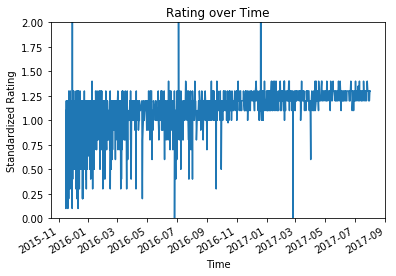

In [66]:

# Plot standardized ratings over time with ylim of 0-2
twitter.groupby('timestamp')['rating'].mean().plot(kind='line')
plt.ylim(0, 2)
plt.title('Rating over Time')
plt.xlabel('Time')
plt.ylabel('Standardized Rating')
plt.show;

Indeed it appears that overtime the frequency of ratings below 1 decreases. Before 2016-11 there many ratings below 1, while after that time there are barely any.

### Resources
1. https://stackoverflow.com/questions/3768895/how-to-make-a-class-json-serializable?utm_medium=organic&utm_source=google_rich_qa&utm_campaign=google_rich_qa
2. https://stackoverflow.com/questions/1024847/add-new-keys-to-a-dictionary
3. https://stackoverflow.com/questions/27900451/convert-tweepy-status-object-into-json?utm_medium=organic&utm_source=google_rich_qa&utm_campaign=google_rich_qa
4. https://stackoverflow.com/questions/16616141/deleting-all-columns-except-a-few-python-pandas?utm_medium=organic&utm_source=google_rich_qa&utm_campaign=google_rich_qa
5. https://stackoverflow.com/questions/23668427/pandas-joining-multiple-dataframes-on-columns?utm_medium=organic&utm_source=google_rich_qa&utm_campaign=google_rich_qa
6. https://regexone.com/lesson/conditionals
7. https://stackoverflow.com/questions/13413590/how-to-drop-rows-of-pandas-dataframe-whose-value-in-certain-columns-is-nan?utm_medium=organic&utm_source=google_rich_qa&utm_campaign=google_rich_qa
8. http://jonathansoma.com/lede/foundations-2017/classes/pandas-text-part-1/classwork/
9. https://stackoverflow.com/questions/25351968/how-to-display-full-non-truncated-dataframe-information-in-html-when-convertin?utm_medium=organic&utm_source=google_rich_qa&utm_campaign=google_rich_qa
10. https://regex101.com/
11. https://stackoverflow.com/questions/9012008/pythons-re-return-true-if-regex-contains-in-the-string?utm_medium=organic&utm_source=google_rich_qa&utm_campaign=google_rich_qa
12. https://stackoverflow.com/questions/37725195/pandas-replace-values-based-on-index?utm_medium=organic&utm_source=google_rich_qa&utm_campaign=google_rich_qa
13. https://docs.python.org/3/library/re.html#match-objects
14. https://stackoverflow.com/questions/33005872/seaborn-regplot-partially-see-through-alpha?utm_medium=organic&utm_source=google_rich_qa&utm_campaign=google_rich_qa
15. https://github.com/mwaskom/seaborn/issues/202
16. https://seaborn.pydata.org/generated/seaborn.lmplot.html
17. https://stackoverflow.com/questions/17071871/select-rows-from-a-dataframe-based-on-values-in-a-column-in-pandas?utm_medium=organic&utm_source=google_rich_qa&utm_campaign=google_rich_qa
18. https://stackoverflow.com/questions/17157753/get-the-error-code-from-tweepy-exception-instance?utm_medium=organic&utm_source=google_rich_qa&utm_campaign=google_rich_qa
